# Examen DataScience 

* Je maakt het examen op je eigen laptop, en rekent daar alles uit.
* Je mag het internet op, maar je mag **niet communiceren**. Het plaatsen van je antwoorden ergens is natuurlijk ook verboden.
* Je levert dit notebook met jouw antwoorden op de juiste plek in via Blackboards assignments, met de naam GlobalLanguageNetwork.

* Veel succes! 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

Read the spreadsheet on `http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt` directly in in pandas in a dataframe called `raw`, and show the first 5 lines of the dataframe `raw`.

* this must be done in 2 lines

In [16]:
raw = pd.read_table("http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt")
raw[:5]

,original_language,target_language,num_translations
0,abk,aze,1
1,abk,bul,1
2,abk,deu,1
3,abk,eng,2
4,abk,est,2


# 2 
We zijn natuurlijk in de Nederlandse taal geinterreseerd. Die heeft code `nld`.

1. Hoeveel regels zijn er in `raw` met `nld` in de kolom `original_language`
2. En hoeveel in de kolom `target_language`
3. Naar welke taal zijn er de meeste vertalingen vanuit het Nederlands?  Geef een one liner die de top 5 laat zien. Je laat alleen de kolommen `['target_language','num_translations']` zien, en eventueel de index kolom.
4. Maak een plotje met op de x-as de namen van talen omgekeerd geordend op het aantal vertalingen, en op de y-as hoe veel vertalingen er vanuit het Nederlands naar die taal is. Zorg dat de y-as in een log schaal geplot wordt.  
    * Je krijgt een wiebelige bijna rechte dalende curve. De x-as  begint met `deu`.

In [45]:
#1
rawnld = raw[raw["original_language"]=="nld"]
print "er zijn:",rawnld["original_language"].count(),"regels met nld als original language"

er zijn: 68 regels met nld als original language


In [47]:
#2
rawnld = raw[raw["target_language"]=="nld"]
print "er zijn:",rawnld["target_language"].count(),"regels met nld als target language"

er zijn: 116 regels met nld als target language


In [59]:
#3
raw[raw["original_language"]=="nld"].sort_values(by='num_translations',ascending=False).loc[:,["target_language","num_translations"]][:5]

,target_language,num_translations
4657,deu,6238
4666,fra,3304
4659,eng,2855
4703,spa,990
4656,dan,810


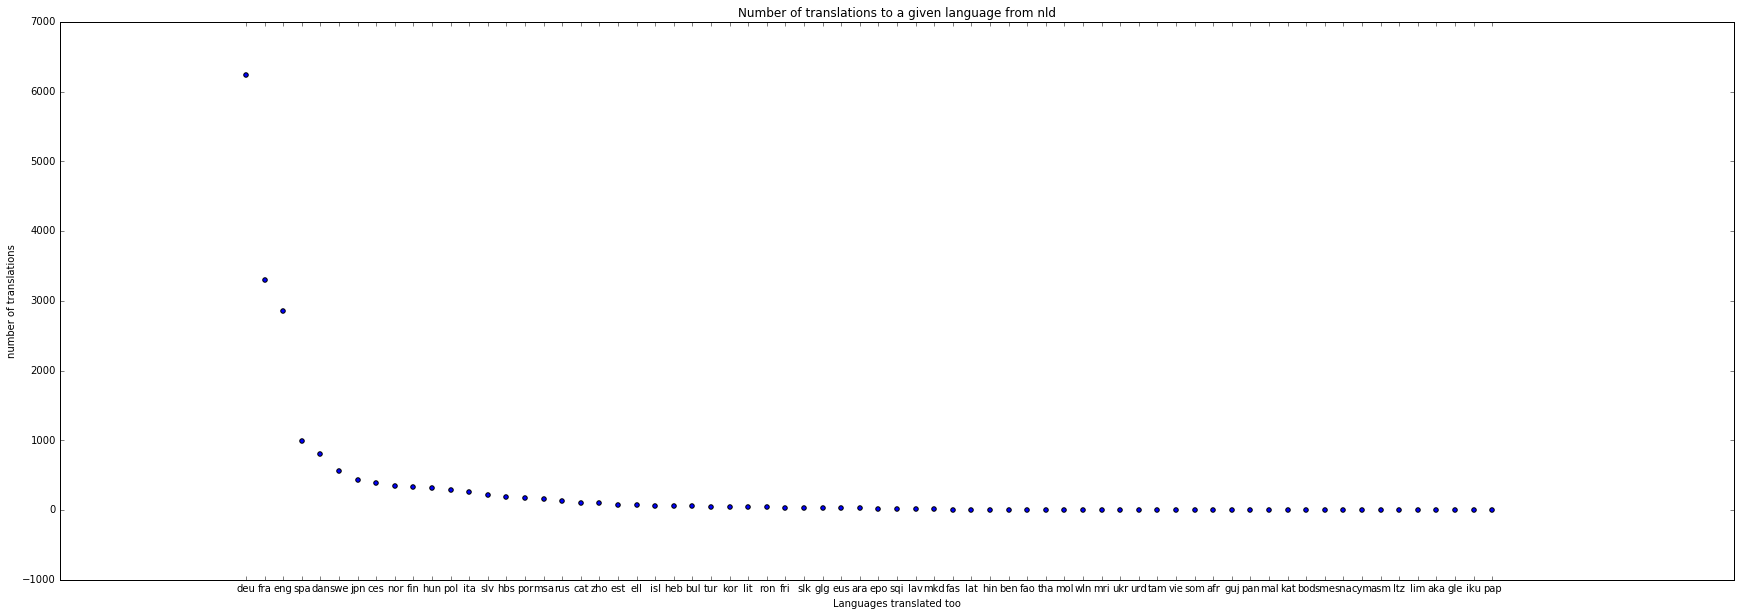

In [90]:
#4
ordered_data = raw[raw["original_language"]=="nld"].sort_values(by='num_translations',ascending=False)
xaxis = ordered_data["target_language"].values
yaxis = ordered_data["num_translations"].values
plt.rcParams['figure.figsize']=(30,10)
plt.scatter(range(0,len(xaxis)),yaxis)
plt.xlabel("Languages translated too")
plt.xticks(np.arange(len(ordered_data)),xaxis)
plt.ylabel("number of translations")
plt.title("Number of translations to a given language from nld")
plt.show()

# 3 

Bekijk eens de output van `spannend= raw.original_language.value_counts()`. Gebruik `?` om uit te vogelen wat `value_counts` eigenlijk doet.

1. Beschrijf, gebruikmakend van terminologie uit de theorie van sociale netwerken, wat `spannend` betekent.
2. Wat betekent `raw.target_language.value_counts()` dan?
3. Maak een pandas Series object genaamd `total_translations` (een Dataframe met maar 1 kolom) met de taalcode als index en met voor elke taal het totaal aantal vertalingen vanuit die taal als waarde. Sorteer weer omgekeerd. De top 5 ziet er dan als volgt uit:
```
eng    1225237
fra     216624
deu     201718
rus     101395
ita      66453
```
    1. Plot `total_translations` in loglog schaal. 
    2. Wat is de waarde in `total_translations` voor het Nederlands?

### 3.1
Dit geeft weer naar hoeveel verschillende talen de talen zijn vertaald. Dus hoe hoger de count, naar hoe meer talen is vertaald. voor grieks betekent dit bijvoorbeeld dat het naar 378 andere talen is vertaald.

### 3.2
Dit geeft aan hoevaak er is vertaald naar die taal. Dus vanuit hoeveel talen er vertalingen zijn naar die taal. Voor engels betekent dit dat er vanuit 427 verschillende talen vertaald is naar het engels.

In [115]:
#3
total_translations = raw.groupby(["original_language"]).sum().sort_values(by="num_translations",ascending=False)
total_translations.head()

,num_translations
original_language,
eng,1225237
fra,216624
deu,201718
rus,101395
ita,66453


In [ ]:
total_translations = Series

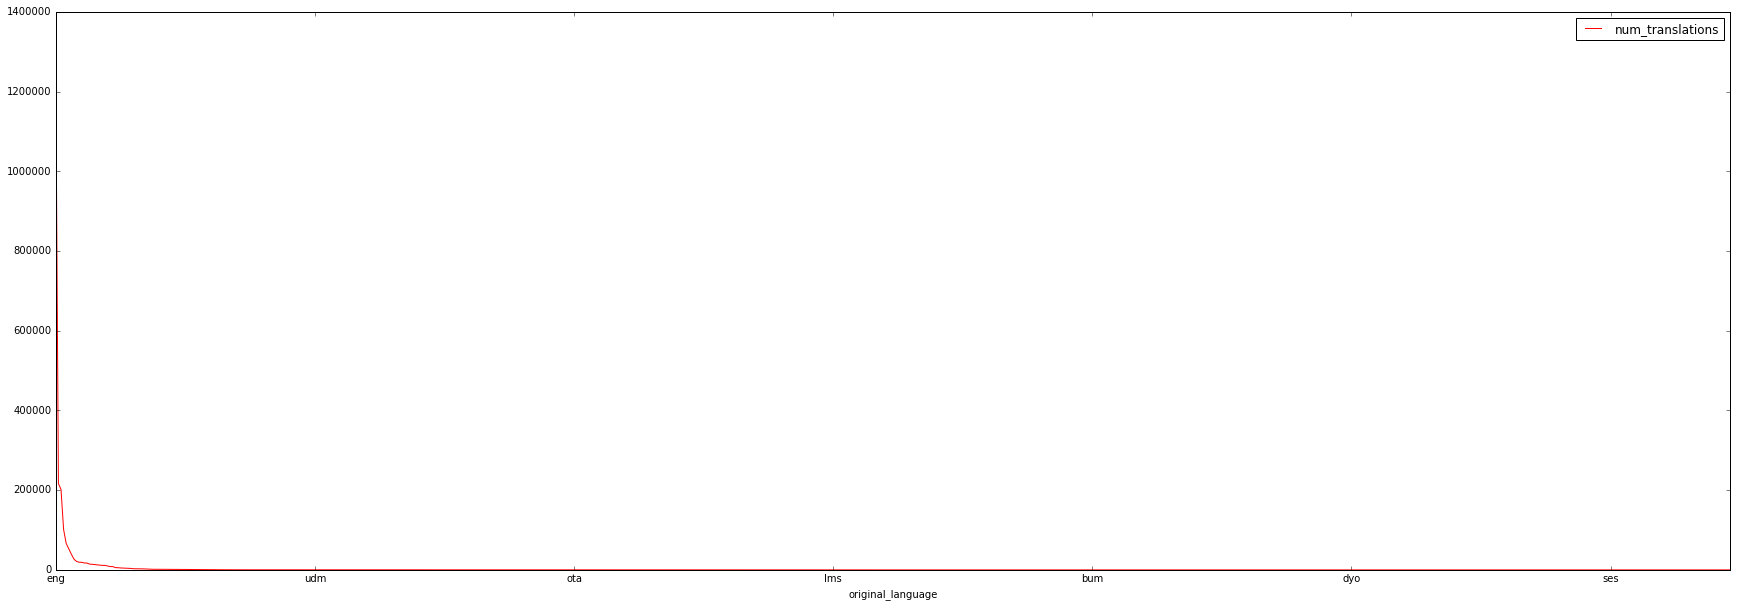

In [181]:
#3A
total_translations.plot(color="red")

In [123]:
#3B
total_translations[total_translations.index=="nld"]

,num_translations
original_language,
nld,18978


# 4

1. Geef de mediaan en het gemiddelde van het aantal vertalingen.
2. Hoeveel taal-paren hebben meer vertalingen dan de mediaan?

In [179]:
#4.1
length = len(total_translations)
mediaan = int(total_translations.values[(len(total_translations)/2)])
gemiddelde = total_translations["num_translations"].sum()/len(total_translations)
print "De mediaan van de dataset is:",mediaan
print "Er zijn gemiddeld:",gemiddelde,"vertalingen per taal"


De mediaan van de dataset is: 3
Er zijn gemiddeld: 3449 vertalingen per taal


In [180]:
#4.2
print "Er zijn:",raw[raw["num_translations"]>mediaan]["num_translations"].count(), "talen paren die meer vertalingen hebben dan de mediaan"

Er zijn: 3289 talen paren die meer vertalingen hebben dan de mediaan
